In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [89]:
def open_blocks_data():
    df_blockstats_daily_mean = pd.read_csv('/home/moises/Data_BTC_thesis/df_blockstats_daily_mean.csv')
    for col in df_blockstats_daily_mean.columns:
        #transformar em float
        try:
            df_blockstats_daily_mean[col] = df_blockstats_daily_mean[col].astype(float)
        except:
            print(col)
            pass
        
    df_blockstats_daily_mean["GMT"] = pd.to_datetime(df_blockstats_daily_mean["GMT"])
    df_blockstats_daily_mean["Date"] = pd.to_datetime(df_blockstats_daily_mean["Date"])
    df_blockstats_daily_mean.set_index("GMT", inplace=True)
    return df_blockstats_daily_mean
df_blockstats_daily_mean = open_blocks_data()

def open_prices_data():
    # Main resource of bitcoin price is the data from ccxt 
    #import df_price_btc_usd_agregate.csv
    df_price_btc_usd_agregate = pd.read_csv("/home/moises/Data_BTC_thesis/df_price_btc_usd_agregate.csv")
    #convert the Date column to datetime
    df_price_btc_usd_agregate["Date"] = pd.to_datetime(df_price_btc_usd_agregate["Date"])
    #set the Date column as index
    #df_price_btc_usd_agregate.set_index("Date", inplace=True)
    btc_price_data = df_price_btc_usd_agregate 
    btc_price_data["Close"] = btc_price_data["Close"].astype(float)
    #set the Date column as index
    btc_price_data.set_index("Date", inplace=True)

    return btc_price_data
btc_price_data = open_prices_data()


dict_col_names = {col:{"log":True, "ylabel":True } for col in df_blockstats_daily_mean.columns} 
dict_col_names["avgfee"] = {"log":True, "ylabel":"sats"}
dict_col_names["avgfeerate"] = {"log":True, "ylabel":"sats/vbyte"}
dict_col_names["avgtxsize"] = {"log":True, "ylabel":"bytes"}
dict_col_names["blockhash"] = {"log":True, "ylabel":None}
dict_col_names["feerate_percentiles"] = {"log":True, "ylabel":None}
dict_col_names["height"] = {"log":True, "ylabel":None}
dict_col_names["ins"] = {"log":False, "ylabel":None}
dict_col_names["maxfee"] = {"log":True, "ylabel":"sats"}
dict_col_names["maxfeerate"] = {"log":True, "ylabel":"sats/vbyte"}
dict_col_names["maxtxsize"] = {"log":False, "ylabel":"bytes"}
dict_col_names["medianfee"] = {"log":True, "ylabel":"sats"}
dict_col_names["mediantime"] = {"log":True, "ylabel":None}
dict_col_names["mediantxsize"] = {"log":True, "ylabel":"bytes"}    
dict_col_names["minfee"] = {"log":True, "ylabel":"sats"}
dict_col_names["minfeerate"] = {"log":True, "ylabel":"sats/vbyte"}
dict_col_names["mintxsize"] = {"log":True, "ylabel":"bytes"}
dict_col_names["outs"] = {"log":False, "ylabel":None}
dict_col_names["subsidy"] = {"log":True, "ylabel":"sats"}
dict_col_names["swtotal_size"] = {"log":False, "ylabel":"bytes"}
dict_col_names["swtotal_weight"] = {"log":False, "ylabel":"wu"}
dict_col_names["swtxs"] = {"log":False, "ylabel":None}
dict_col_names["time"] = {"log":True, "ylabel":None}
dict_col_names["total_out"] = {"log":True, "ylabel":"sats"}
dict_col_names["total_size"] = {"log":False, "ylabel":"bytes"}
dict_col_names["total_weight"] = {"log":False, "ylabel":"wu"}
dict_col_names["totalfee"] = {"log":True, "ylabel":"sats"}
dict_col_names["txs"] = {"log":False, "ylabel":None}
dict_col_names["utxo_increase"] = {"log":False, "ylabel":None}
dict_col_names["utxo_size_inc"] = {"log":False, "ylabel":None}
dict_col_names["utxo_size_inc_actual"] = {"log":False, "ylabel":None}
dict_col_names["GMT"] = {"log":True, "ylabel":None}
dict_col_names["year"] = {"log":True, "ylabel":None}
dict_col_names["avgfee_btc"] = {"log":True, "ylabel":"BTC"}
dict_col_names["maxfee_btc"] = {"log":True, "ylabel":"BTC"}
dict_col_names["minfee_btc"] = {"log":True, "ylabel":"BTC"}
dict_col_names["subsidy_btc"] = {"log":True, "ylabel":"BTC"}
dict_col_names["blockhash_decimal"] = {"log":True, "ylabel":None}


list_fee_names = ["avgfee", "avgfeerate", "maxfee", "maxfeerate", "medianfee", "minfee", "minfeerate", "totalfee"]
list_size_names = ["avgtxsize", "maxtxsize", "mediantxsize", "mintxsize", "swtotal_size", "swtotal_weight", "total_size", "total_weight"]
list_count_names = ["ins", "outs", "swtxs", "txs", "utxo_increase", "utxo_size_inc", "utxo_size_inc_actual"]
list_time_names = ["time", "mediantime"]
list_subsidy_names = ["subsidy", "subsidy_btc"]
list_block_names = ["blockhash", "blockhash_decimal", "height", "year", "GMT"]
list_other_names = ["feerate_percentiles"]
 



GMT
Date


In [96]:
df_blockstats_daily_mean.columns

Index(['index', 'avgfee', 'avgfeerate', 'avgtxsize', 'height', 'ins', 'maxfee',
       'maxfeerate', 'maxtxsize', 'medianfee', 'mediantime', 'mediantxsize',
       'minfee', 'minfeerate', 'mintxsize', 'outs', 'subsidy', 'swtotal_size',
       'swtotal_weight', 'swtxs', 'time', 'total_out', 'total_size',
       'total_weight', 'totalfee', 'txs', 'utxo_increase', 'utxo_size_inc',
       'utxo_increase_actual', 'utxo_size_inc_actual', 'year', 'avgfee_btc',
       'maxfee_btc', 'minfee_btc', 'subsidy_btc', 'blockhash_decimal', 'Close',
       'Date', 'avgfee_USD', 'maxfee_USD', 'minfee_USD'],
      dtype='object')

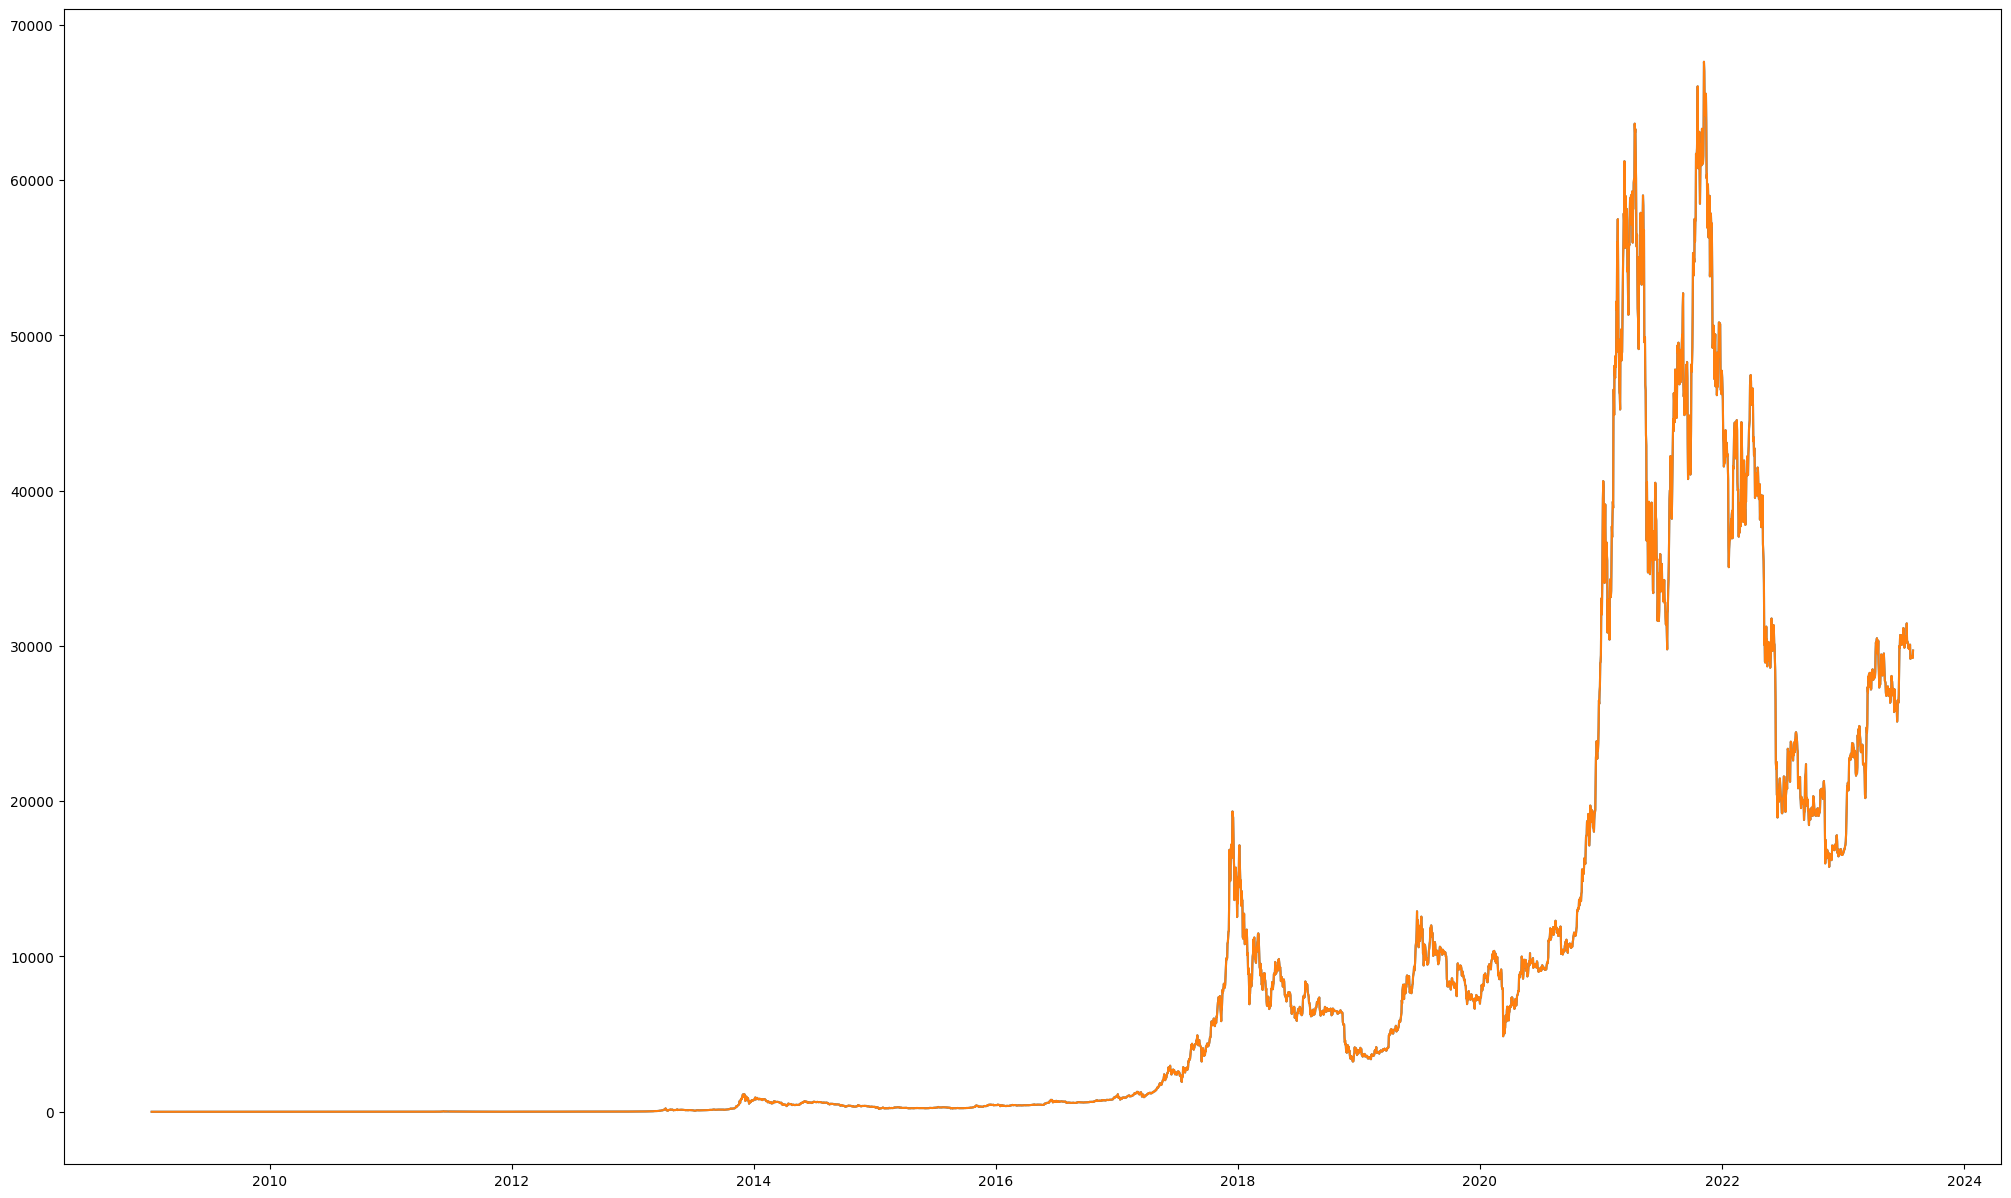

In [18]:
#plot the data to see the missing values filled
plt.figure(figsize=(25,15))
plt.plot(btc_price_data["Close"])
plt.show()


In [90]:
a = sm.tsa.stattools.ccf(btc_price_data["Close"],df_blockstats_daily_mean["avgfee_USD"], adjusted=False)
print(a[1:500]) 

[0.51100027 0.51042996 0.51010621 0.51008349 0.5102126  0.51075037
 0.51124278 0.51156063 0.51201361 0.5108323  0.51019824 0.50957777
 0.50922333 0.50883011 0.50844404 0.50806415 0.50797783 0.50665974
 0.50528053 0.50420683 0.50237061 0.50061032 0.49934881 0.49794373
 0.49641954 0.49493251 0.49345268 0.49172388 0.49016233 0.488661
 0.48733104 0.48639827 0.48583767 0.48499311 0.48429849 0.48353043
 0.48311098 0.48197414 0.48110864 0.48039074 0.47985397 0.47979669
 0.47992596 0.47953663 0.47920279 0.4789438  0.47893362 0.47900552
 0.47880516 0.47855937 0.47838351 0.47860974 0.47815228 0.47793722
 0.47718723 0.47630887 0.47525109 0.47409944 0.47256698 0.47154879
 0.47047414 0.46960894 0.46882396 0.46807252 0.46743565 0.4665822
 0.46591247 0.46472972 0.46370408 0.46276851 0.46177421 0.46091091
 0.46022923 0.45889524 0.45783782 0.45648115 0.45505171 0.45400382
 0.45278522 0.45145066 0.44984    0.44843302 0.44669526 0.44489155
 0.44302822 0.44129733 0.44061916 0.43950148 0.43919512 0.4391046

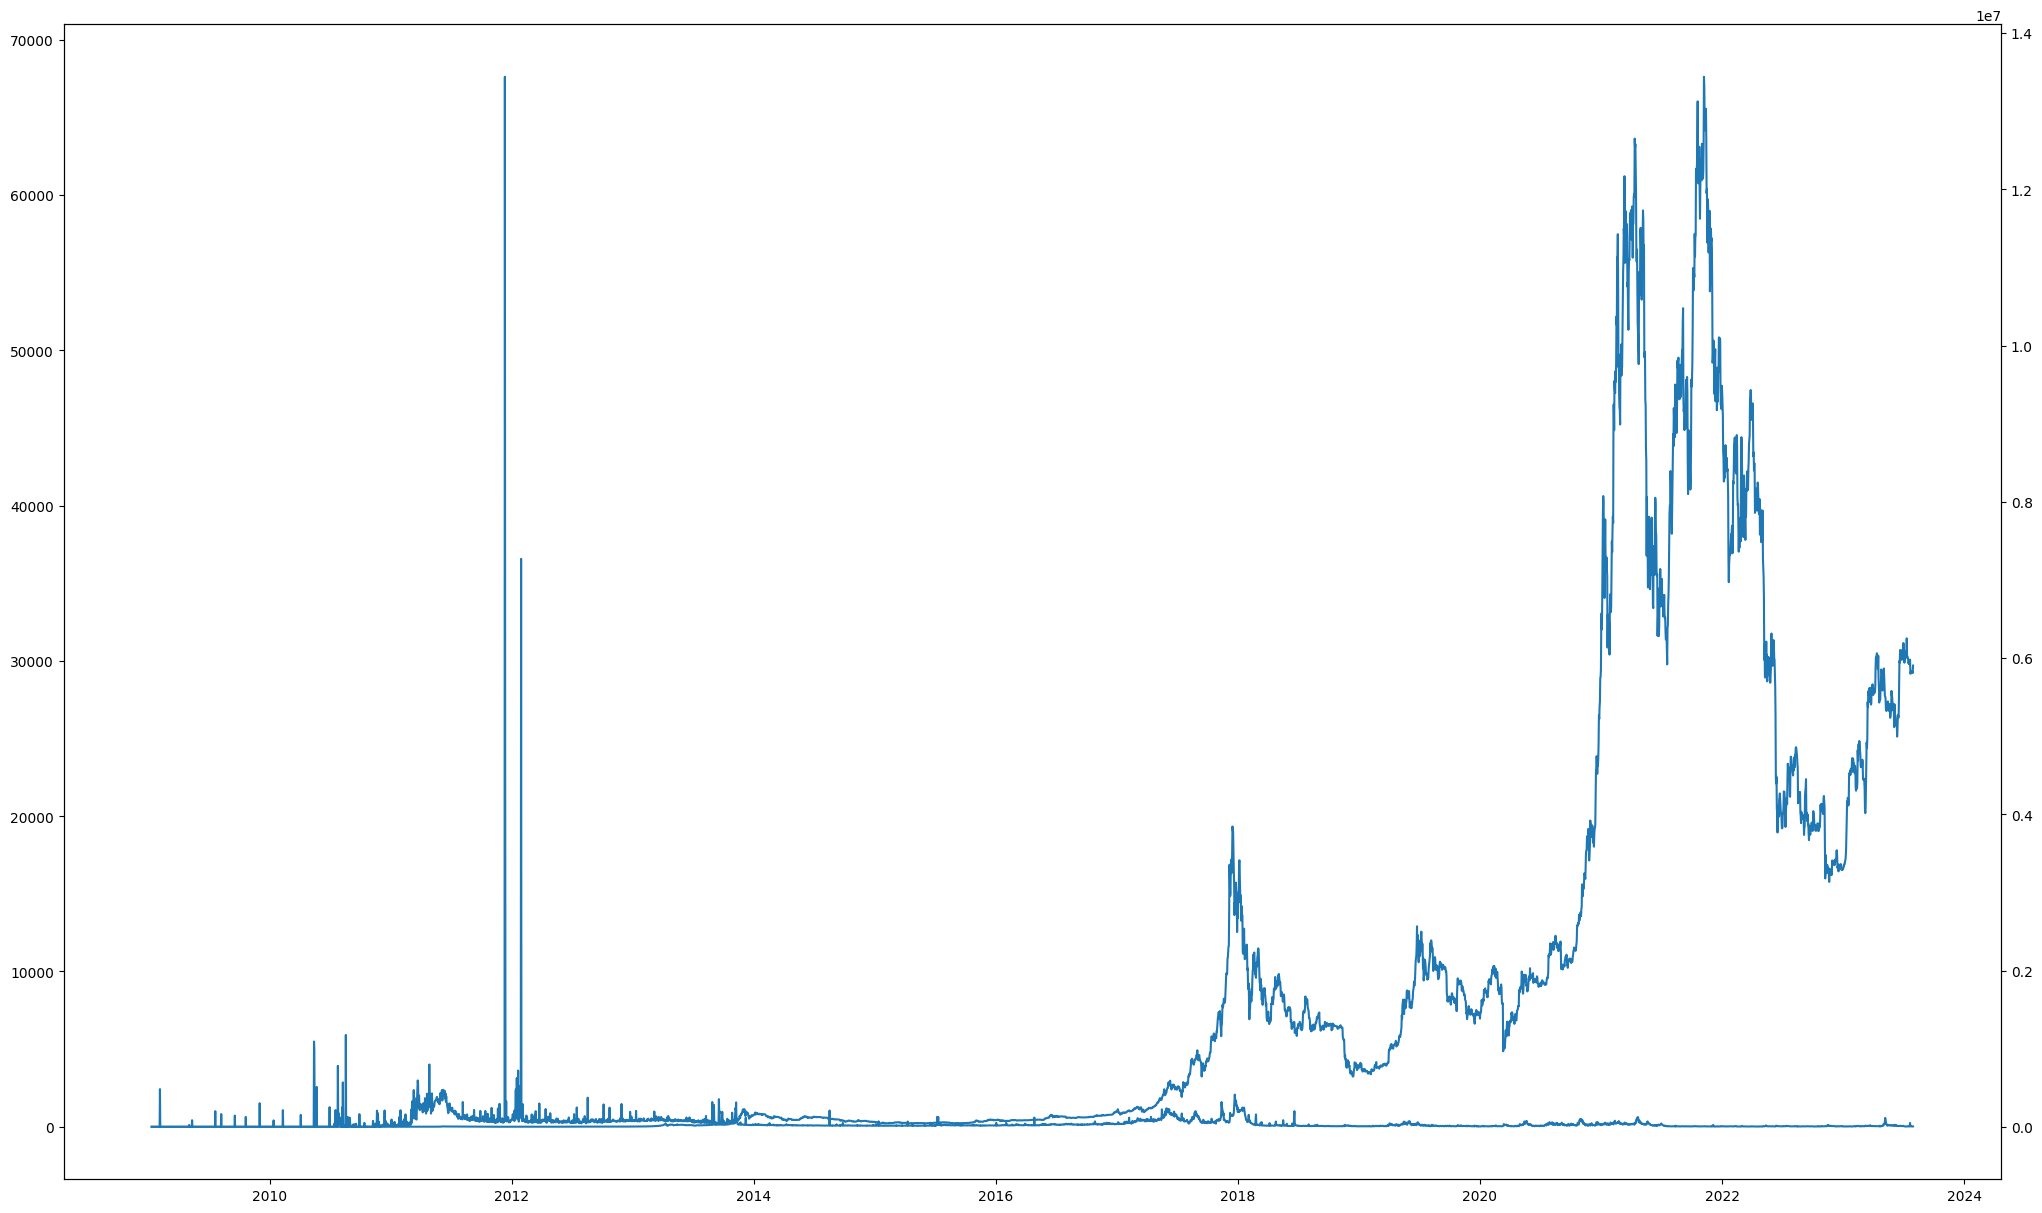

In [59]:
fig, ax1 = plt.subplots(figsize=(25,15))
ax1.plot(btc_price_data["Close"])
ax2 = ax1.twinx()
ax2.plot(df_blockstats_daily_mean["avgfee"])

<BarContainer object of 364 artists>

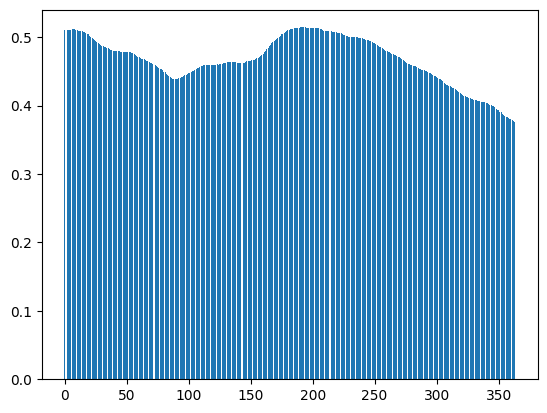

In [95]:
b = pd.DataFrame(a[1:365])

plt.bar(b.index, b[0])